In [1]:
import specdb
import numpy as np
db_file = '/Users/Jenny/documents/pycodes/specdb/specdb/data/DB/IGMspec_DB_v03.hdf5'
db_file2 = '/Users/Jenny/documents/pycodes/specdb/specdb/data/DB/IGMspec_DB_v02.1.hdf5'
from specdb.specdb import SpecDB
from matplotlib import pylab as plt
import numpy.ma as ma
from scipy import stats
from linetools.spectra.utils import smash_spectra
from linetools.spectra.xspectrum1d import XSpectrum1D
from random import choices
import itertools as it
import scipy.stats
from astropy.coordinates import SkyCoord
from astroML.crossmatch import crossmatch_angular

from mpl_toolkits.mplot3d import Axes3D
plt.style.use(['classic'])

ModuleNotFoundError: No module named 'astroML'

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)
import matplotlib.ticker as ticker

In [5]:
data_z = np.loadtxt("/Users/Jenny/Documents/pycodes/specdb/specdb/data/DB/Lyman_alpha_result_balout_z_ratio_mcmc_1075-1150_avecombine_highz_newbin_cut1075snr>2.2.txt")
data_z = data_z[:,0]

In [6]:
data_all = np.loadtxt("/Users/Jenny/Documents/pycodes/specdb/specdb/data/DB/Lyman_alpha_result_balout_z>2.5_3.2base_1075-1150_mcmcflux_avecombine_highz_newbin_cut1075snr>2.2.txt")
i = range(0, len(data_all))
data_indi_wave = np.split(data_all[i,0], len(data_z))

print (data_indi_wave[5]*(1+data_z[5])/1215.67-1)

[2.58106329 2.58188797 2.58271282 2.58353786 2.58436309 2.58518852
 2.58601412 2.58683994 2.58766593 2.58849213 2.58931852 2.59014507
 2.59097184 2.59179877 2.59262592 2.59345325 2.59428078 2.59510849
 2.59593638 2.59676448 2.59759274 2.59842124 2.59924989 2.60007875
 2.60090781 2.60173704 2.60256647 2.60339607 2.60422589 2.60505588
 2.60588608 2.60671647 2.60754705 2.60837781 2.60920876 2.61003992
 2.61087125 2.61170277 2.61253449 2.61336641 2.61419851 2.61503079
 2.61586329 2.61669597 2.61752884 2.6183619  2.61919515 2.6200286
 2.62086223 2.62169606 2.62253008 2.6233643  2.6241987  2.6250333
 2.6258681  2.62670307 2.62753826 2.62837361 2.62920917 2.63004492
 2.63088086 2.63171702 2.63255332 2.63338985 2.63422656 2.63506347
 2.63590057 2.63673787 2.63757537 2.63841302 2.63925091 2.64008895
 2.64092723 2.64176568 2.64260432 2.64344316 2.64428217 2.64512141
 2.64596081 2.64680043 2.64764024 2.64848023 2.64932042 2.65016079
 2.65100138 2.65184213 2.65268311 2.65352427 2.65436563 2.655207

In [7]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [81]:
#using the function with snr cut will return the fraction of selected sample and the median ratio between dr14 and dr7
def reading_data(interval,plot=True):
    
    data = []
    index = []
    for i in np.arange(0.9,1.0,interval):
        
    
        k = '{:.1f}'.format(i)
        index.append(i)
        datai = np.split(np.loadtxt("/Users/Jenny/Documents/pycodes/specdb/specdb/data/DB/covariance_test/testalpha_1075-1150_co_20000_"+str(k)+"_testing_snr2.2.txt"),19)
        for i in range(0,19):
        

            data.append(np.reshape(datai[i], (290, 290)))

            
      

#data_error3 = np.loadtxt("Lyman_alpha_binning_flux_covariance_z>2.5-4.8_1075-1150_3.2base_dr14_newbin.txt")
    
    #i = range(0, len(data_dr14dr7))
    #data_indi_flux7 = np.split(data_dr14dr7[i,1], len(data_z_r7))
    #data_indi_wave7 = np.split(data_dr14dr7[i,0], len(data_z_r7))
    
    print (np.array(data[0]),index[0])
    if plot == True:
        fig, ax = plt.subplots(3, 2, figsize=(22, 20), gridspec_kw={'wspace': 0.18, 'hspace': 0.23}, sharex=False, sharey=False)

        fig.subplots_adjust(left=0.05, bottom=0.05, right=0.9, top=0.95)
        i = 3
        #fig.text(0.5, 0.003,  r'z',fontsize =15, ha='center')
        #fig.text(0.01, 0.5, r'z', fontsize =15,va='center', rotation='vertical')
        degrees = [(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
        for index in range(ax.shape[0]):
            for jndex in range(ax.shape[1]):
                #ax[index][jndex].axhline(1,alpha = 0.5)
                #ax[index][jndex].axhline(np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]),c = 'r', label =  'median ratio for DR14/DR7 (1075-1150)')
                cr = ax[index][jndex].contourf(np.array(data[i]),cmap="RdBu_r")
                cbar = fig.colorbar(cr, ax=ax[index][jndex],format='%.0e')
         
                #formatter = ScalarFormatter(useMathText=False)
               # formatter.set_powerlimits((0, 0))
                cbar.formatter = StrMethodFormatter("{x:.6f}")
                cbar.update_ticks()
                #cbar.ax.set_title('')
                ax[index][jndex].set_title('z$_{c}$ = '+str(np.round(data_z[i],2)),fontsize = 23)
                
                #ax[index][jndex].set_xticks(np.linspace(0,282,5),np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3))
                ax[index][jndex].set_yticks([0,50,100,150,200,250,281])
                ax[index][jndex].set_xticks([0,50,100,150,200,250,281])
                #print (np.array(ax[index][jndex].get_xticks())[1])
                #print (np.array([1,2,3,4,5])[np.array(ax[index][jndex].set_xticks())])
                ax[index][jndex].set_yticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_yticks(),dtype = int)],fontsize=16.5)
                ax[index][jndex].set_xticklabels(np.round(data_indi_wave[i]*(1+data_z[i])/1215.67-1,3)[np.array(ax[index][jndex].get_xticks(),dtype = int)],fontsize=16.5)
               
                cbar.ax.set_title(r'sigma_ij^2', fontsize=22,loc='right')
                #ax[index][jndex].set_xlabel('z',fontsize=25)
                #ax[index][jndex].set_ylabel('z',fontsize=25)
                #ax[index][jndex].plot(np.array(data_indi_wave7[i]),data_indi_flux7[i], label=str('{:.2f}'.format(data_z_r7[i,0]))+' dr7 data')
                #ax[index][jndex].set_xlim(1075,1150)
                #ax[index][jndex].set_ylim(0.5,6.0)
        #ax[index][jndex].plot(np.array(data_indi_wave3[i]),data_indi_flux3[i], label=str('{:.2f}'.format(data_z3[i])) + ' dr12 data')
        #ax[index][jndex].plot(np.array(data_indi_wave4[i]),data_indi_flux4[i], label=str('{:.2f}'.format(data_z4[i])) + ' dr12 corrected data')
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--',label = str(names[i]))
        # ax[index][jndex].axvline(rest_wave[i]*3.309,c='k',linestyle = '--')
        # ax[index][jndex].annotate('0.25 on axes', (0.25,4530), textcoords='data', size=20)
        #print (np.median(data_indi_flux[i][(1075 <data_indi_wave[i]) & (data_indi_wave[i] < 1150)][:292]/data_indi_flux7[i][(1075 <data_indi_wave7[i]) & (data_indi_wave7[i] < 1150)][:292]))
                #ax[index][jndex].legend()
                #ax[index][jndex].set_xlabel('wavelength')
                #ax[index][jndex].set_ylabel('flux')
        #ax[index][jndex].set_xticklabels('{:.2f}'.format(np.array(data_indi_wave[i]/1215.67*(1+data_z[i]))))
                i = i + 3
        common_xlabel = "Redshift Z"
        common_ylabel = "Redshift Z"
        fig.text(0.45, 0.025, common_xlabel, ha='center',fontsize=20)
        fig.text(0.0, 0.5, common_ylabel, va='center', rotation='vertical',fontsize=20)
        
        plt.tight_layout()
        plt.savefig('covariance_plot_redshiftall.pdf')
        plt.show(fig)
        
        
   
        
    

[[5.35309300e-05 2.60000943e-05 1.47058572e-05 ... 4.84086149e-06
  4.70285840e-06 4.36350638e-06]
 [2.60000943e-05 5.03098127e-05 2.40168520e-05 ... 4.63496781e-06
  4.26032193e-06 4.61125455e-06]
 [1.47058572e-05 2.40168520e-05 5.10125683e-05 ... 4.46015247e-06
  4.13406860e-06 3.75372201e-06]
 ...
 [4.84086149e-06 4.63496781e-06 4.46015247e-06 ... 2.46728596e-05
  1.47407181e-05 9.70860219e-06]
 [4.70285840e-06 4.26032193e-06 4.13406860e-06 ... 1.47407181e-05
  2.52114351e-05 1.46373650e-05]
 [4.36350638e-06 4.61125455e-06 3.75372201e-06 ... 9.70860219e-06
  1.46373650e-05 2.41476100e-05]] 0.9


<ipython-input-81-c107d31d5e91>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


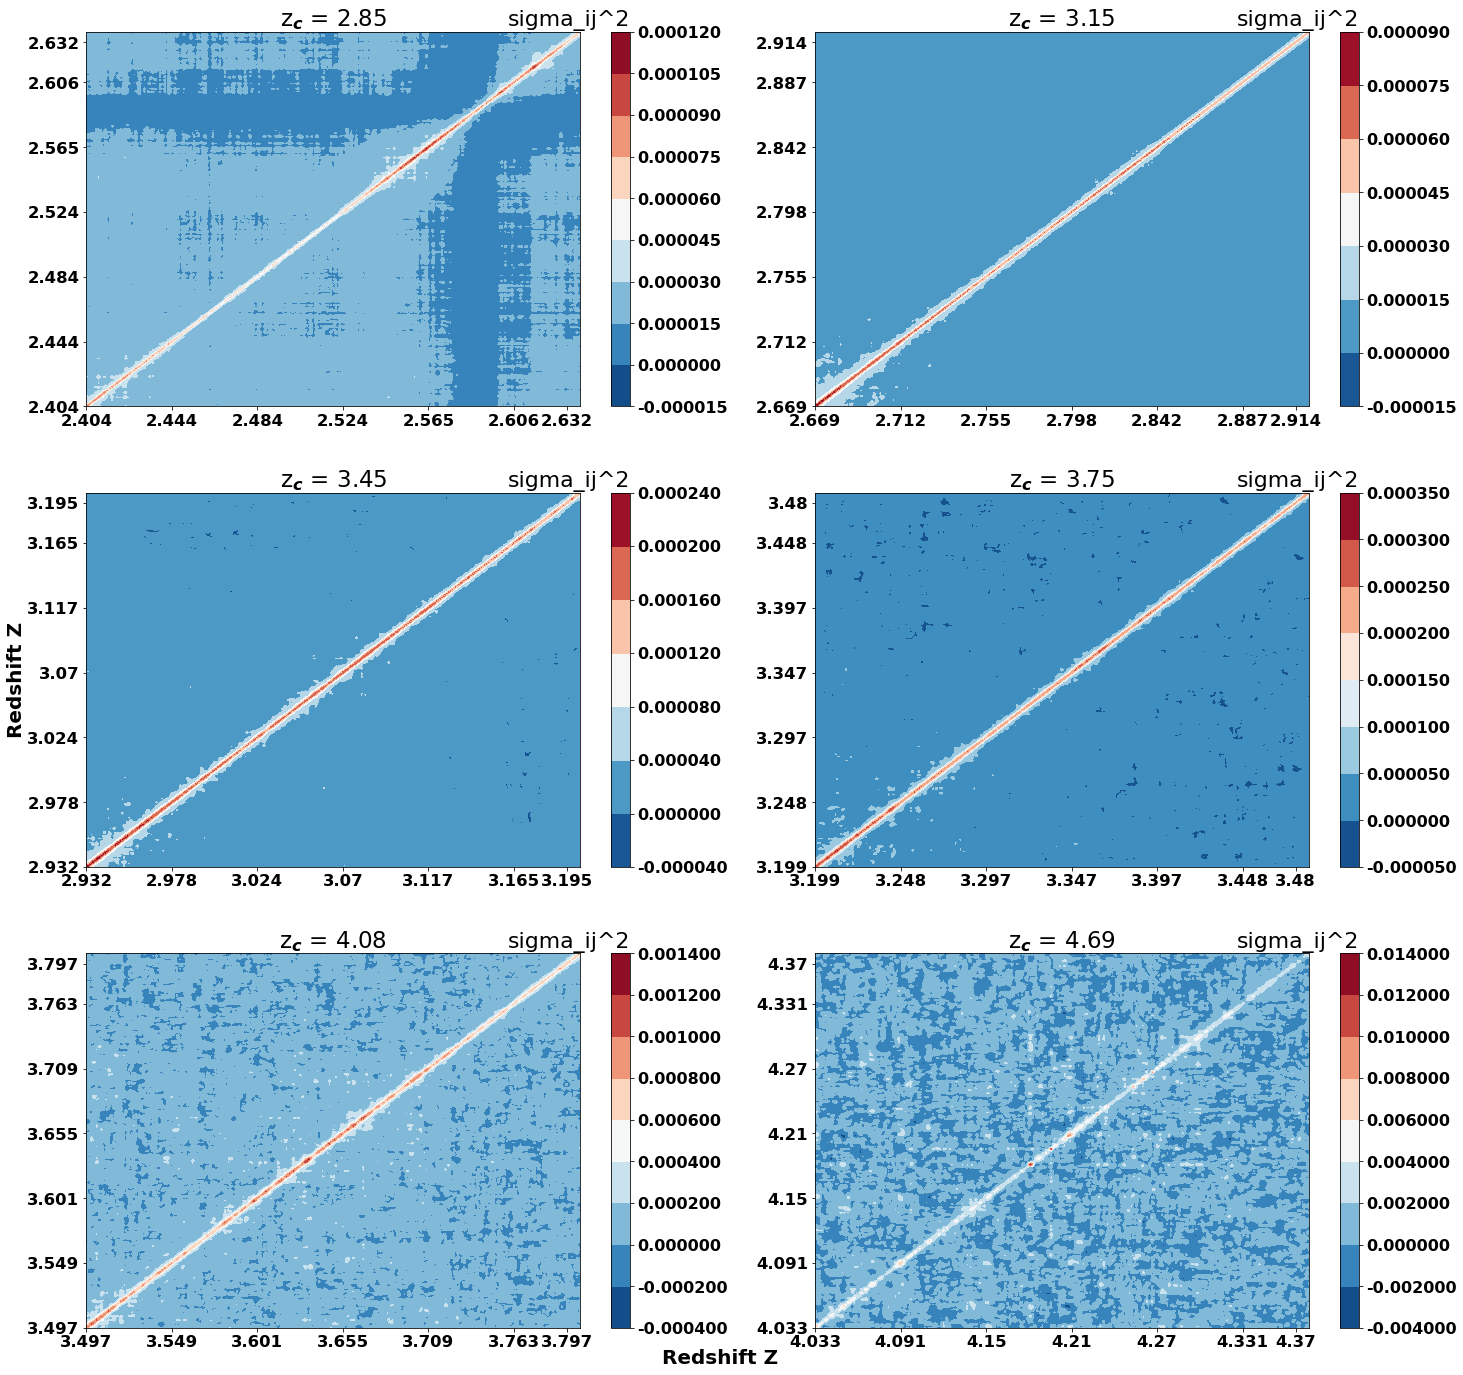

In [82]:
reading_data(0.1,plot=True)


[[5.35309300e-05 2.60000943e-05 1.47058572e-05 ... 4.84086149e-06
  4.70285840e-06 4.36350638e-06]
 [2.60000943e-05 5.03098127e-05 2.40168520e-05 ... 4.63496781e-06
  4.26032193e-06 4.61125455e-06]
 [1.47058572e-05 2.40168520e-05 5.10125683e-05 ... 4.46015247e-06
  4.13406860e-06 3.75372201e-06]
 ...
 [4.84086149e-06 4.63496781e-06 4.46015247e-06 ... 2.46728596e-05
  1.47407181e-05 9.70860219e-06]
 [4.70285840e-06 4.26032193e-06 4.13406860e-06 ... 1.47407181e-05
  2.52114351e-05 1.46373650e-05]
 [4.36350638e-06 4.61125455e-06 3.75372201e-06 ... 9.70860219e-06
  1.46373650e-05 2.41476100e-05]] 0.9


<ipython-input-74-6834e0bc233c>:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


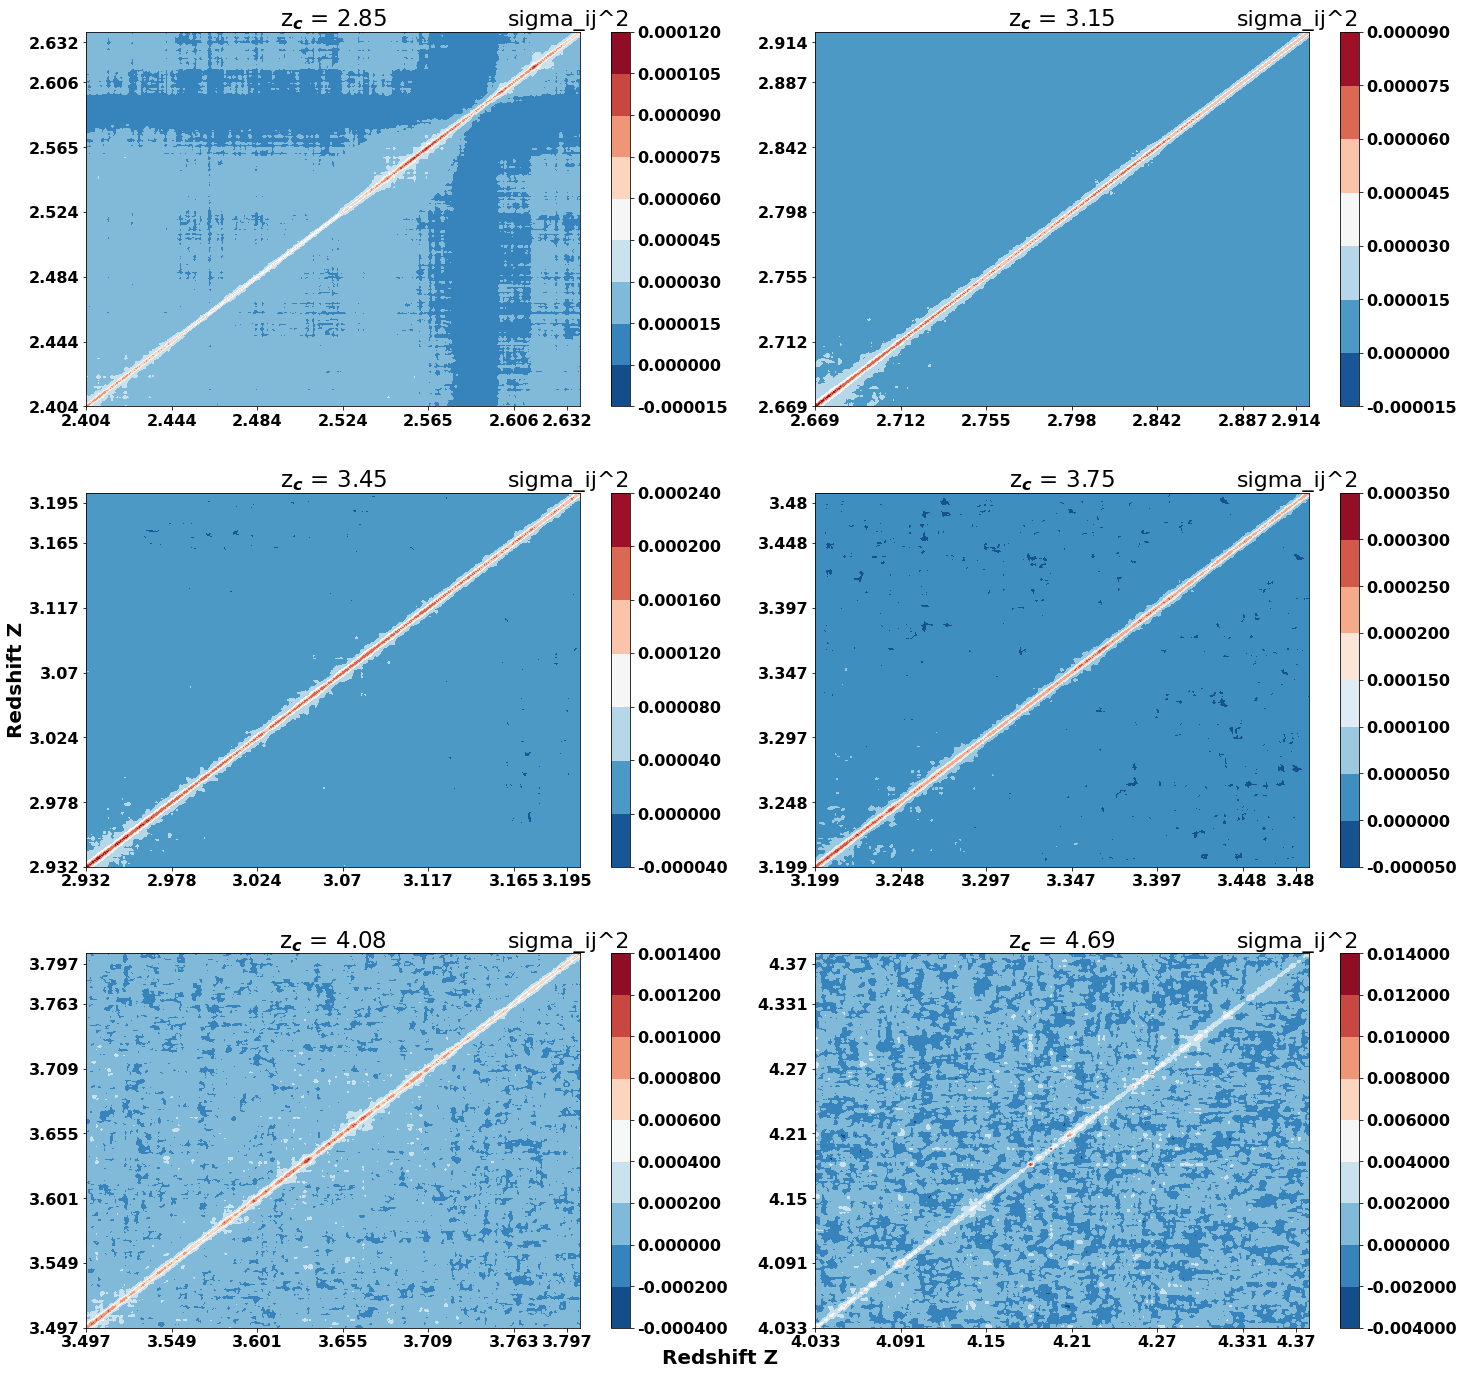

In [76]:
reading_data(0.1,plot=True)